In [179]:
import pandas as pd
import numpy as np
import yfinance as yf

In [256]:
stock_symbol = 'GOOG'
df = yf.download(stock_symbol, start="2020-03-01", end="2025-03-01")

[*********************100%***********************]  1 of 1 completed


In [257]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2020-03-02,69.128075,69.215665,66.028012,67.261914,48630000
2020-03-03,66.753334,70.175123,66.286042,69.641153,48046000
2020-03-04,68.999184,69.077320,66.838922,67.641122,38266000
2020-03-05,65.641090,67.625192,64.947370,67.191744,51226000
2020-03-06,64.614456,65.003111,62.755262,63.551987,53212000


In [258]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2025-02-24,180.983810,184.879366,180.674166,183.590841,18734000
2025-02-25,177.168152,180.554293,176.568844,179.949986,20832500
2025-02-26,174.501190,177.877349,173.392453,176.743646,23637200
2025-02-27,170.016312,176.389041,169.558825,175.739787,25930500
2025-02-28,172.024017,172.303697,168.198374,170.106204,30049800


In [259]:
df1 = df['Close']

In [260]:
df1.shape

(1257, 1)

In [261]:
df1

Ticker,GOOG
Date,
2020-03-02,69.128075
2020-03-03,66.753334
2020-03-04,68.999184
2020-03-05,65.641090
2020-03-06,64.614456
...,...
2025-02-24,180.983810
2025-02-25,177.168152
2025-02-26,174.501190


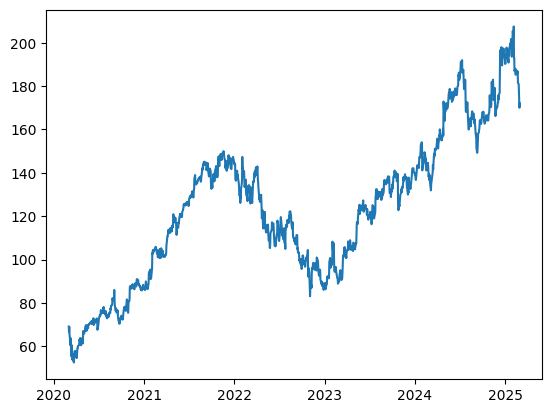

In [262]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [263]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [264]:
df1

array([[0.10682384],
       [0.09149221],
       [0.1059917 ],
       ...,
       [0.7871258 ],
       [0.75817087],
       [0.77113286]])

In [265]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [266]:
training_size,test_size

(817, 440)

In [267]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [268]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [269]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [270]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [271]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [272]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [273]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [274]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [275]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0575 - val_loss: 0.0587
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0079 - val_loss: 0.0049
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0032 - val_loss: 0.0123
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0019 - val_loss: 0.0083
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0016 - val_loss: 0.0047
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0013 - val_loss: 0.0030
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

In [276]:
import tensorflow as tf

In [278]:
tf.__version__

'2.18.0'

In [279]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [280]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [281]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

113.82771148062007

In [282]:
math.sqrt(mean_squared_error(ytest,test_predict))

163.7437520516307

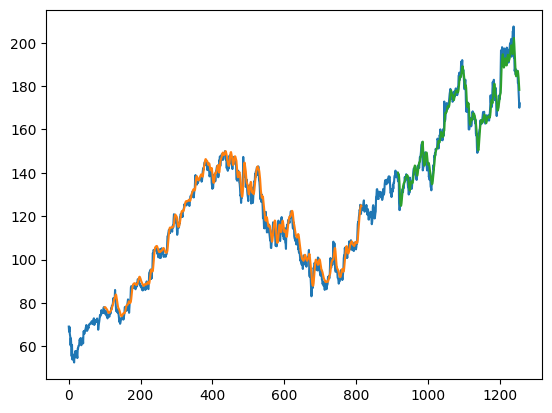

In [283]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [284]:
len(test_data)

440

In [285]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [286]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [287]:
temp_input

[0.7462985167074365,
 0.719437566688442,
 0.7278758642175602,
 0.7108704146212466,
 0.7116433448244226,
 0.7202750226733006,
 0.7320629471165656,
 0.7356056588125408,
 0.7345751180458537,
 0.7202104968916181,
 0.7236889783438423,
 0.7285201369079466,
 0.7350904376855192,
 0.7200173135971459,
 0.7203394499423392,
 0.7361854057212449,
 0.7448814123265175,
 0.7629175997148059,
 0.7951249294249261,
 0.7729018561629202,
 0.7726441470867655,
 0.7599544379022469,
 0.7646568404409178,
 0.8092316444777197,
 0.8346754901157953,
 0.8190871449004005,
 0.8326786388261724,
 0.8413746454314452,
 0.8231452747486849,
 0.8029191512889455,
 0.7806316507579008,
 0.7993763410803265,
 0.8172835754178935,
 0.8027901982382244,
 0.750678782900914,
 0.7334801500101282,
 0.7519025069620731,
 0.7595678742880152,
 0.7608563211561443,
 0.7587306153284441,
 0.7747697544018219,
 0.7750274634779766,
 0.794802793079733,
 0.7833369064690174,
 0.7973794897907036,
 0.8026029257023797,
 0.8634148792265772,
 0.9290635080229

In [288]:
len(temp_input)

100

In [289]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.77453184]
101
1 day input [0.71943757 0.72787586 0.71087041 0.71164334 0.72027502 0.73206295
 0.73560566 0.73457512 0.7202105  0.72368898 0.72852014 0.73509044
 0.72001731 0.72033945 0.73618541 0.74488141 0.7629176  0.79512493
 0.77290186 0.77264415 0.75995444 0.76465684 0.80923164 0.83467549
 0.81908714 0.83267864 0.84137465 0.82314527 0.80291915 0.78063165
 0.79937634 0.81728358 0.8027902  0.75067878 0.73348015 0.75190251
 0.75956787 0.76085632 0.75873062 0.77476975 0.77502746 0.79480279
 0.78333691 0.79737949 0.80260293 0.86341488 0.92906351 0.90920119
 0.89469146 0.93841423 0.93170739 0.88675942 0.88385753 0.90488053
 0.92442031 0.93460947 0.93157854 0.91184517 0.90313941 0.88862958
 0.88985488 0.90597687 0.9371245  0.92906351 0.92055103 0.90623478
 0.90055976 0.89256339 0.93080462 0.91423125 0.93448042 0.9478939
 0.95047336 0.94757147 0.96253259 0.91010406 0.93138506 0.93209435
 0.96724021 0.98639314 0.96730464 1.         0.90707312 0.90713755
 0.86734859 0.87418428 0.8668973  

In [290]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [291]:
len(df1)

1257

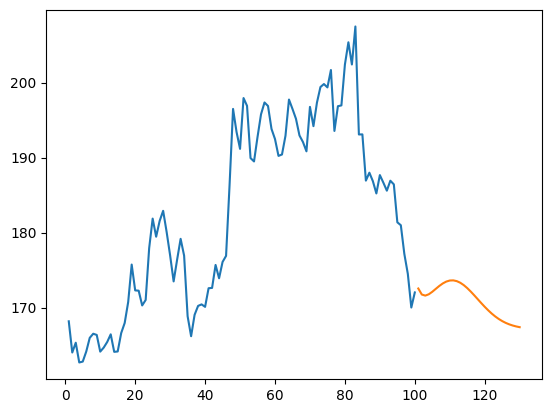

In [292]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

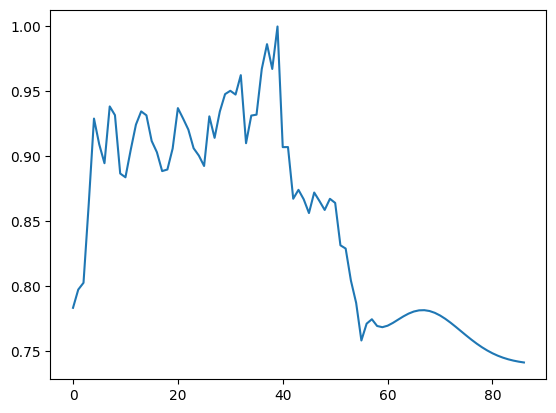

In [296]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [297]:
df3=scaler.inverse_transform(df3).tolist()

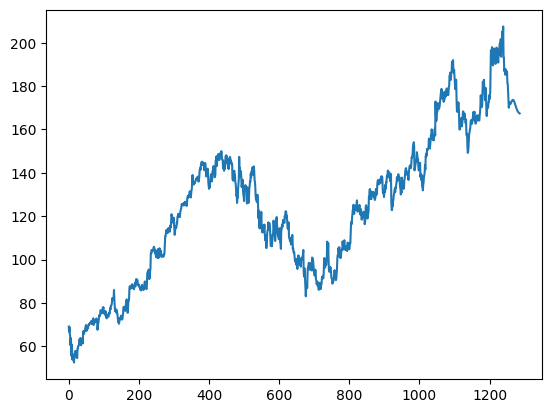

In [298]:
plt.plot(df3)